In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)

date_rng = pd.date_range(start='2024-01-01', end='2024-03-01', freq='D')

data = {
    'date': date_rng,
    'value': np.random.randint(50, 150, size=len(date_rng))
}

df = pd.DataFrame(data)

df.loc[np.random.choice(df.index, size=5, replace=False), 'value'] = np.nan

df = pd.concat([df, df.iloc[:3]], ignore_index=True)

df.loc[np.random.choice(df.index, size=2, replace=False), 'value'] = [500, -50]

df = df.sample(frac=1).reset_index(drop=True)

print(df.head(10))


        date  value
0 2024-01-30   98.0
1 2024-02-13  113.0
2 2024-01-10  124.0
3 2024-01-07  132.0
4 2024-01-16  -50.0
5 2024-02-05  129.0
6 2024-01-26  125.0
7 2024-02-18  122.0
8 2024-02-23  109.0
9 2024-02-16   56.0


In [ ]:
df['date'] = pd.to_datetime(df['date'])

df = df.sort_values(by='date').reset_index(drop=True)

df['value'] = df['value'].fillna(method='ffill')

df = df.drop_duplicates(subset=['date'], keep='first')

Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['value'] = np.where((df['value'] < lower_bound) | (df['value'] > upper_bound), df['value'].median(), df['value'])

print(df.head(10))


         date  value
0  2024-01-01  101.0
2  2024-01-02  142.0
4  2024-01-03  109.0
6  2024-01-04  121.0
7  2024-01-05  121.0
8  2024-01-06   70.0
9  2024-01-07  132.0
10 2024-01-08  136.0
11 2024-01-09  124.0
12 2024-01-10  124.0


<ipython-input-2-60faa737ef5e>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['value'] = df['value'].fillna(method='ffill')
<ipython-input-2-60faa737ef5e>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['value'] = np.where((df['value'] < lower_bound) | (df['value'] > upper_bound), df['value'].median(), df['value'])


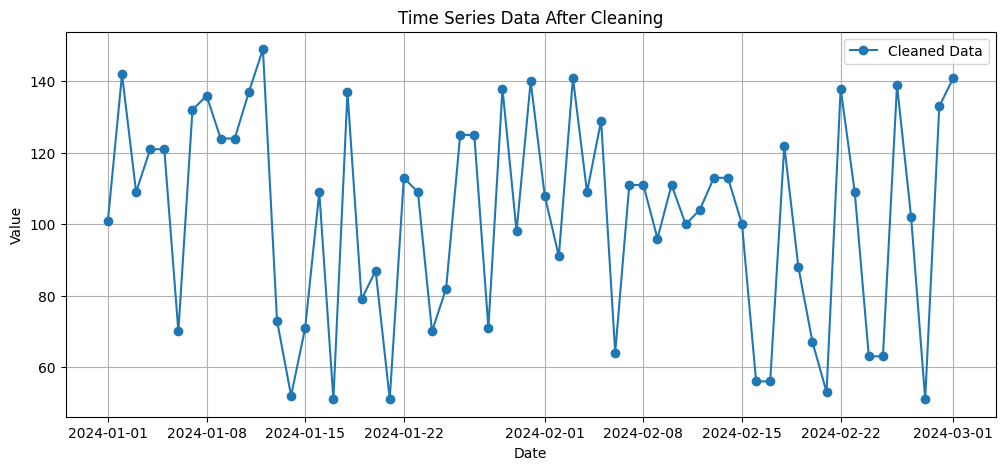

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['value'], label='Cleaned Data', marker='o')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Data After Cleaning')
plt.grid()
plt.legend()
plt.show()